# Explore here

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [22]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
#Definimos las variables independientes(X) y la Dependiente (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [24]:
#Dividimos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)


DecisionTreeClassifier()

In [27]:
y_pred = modelo.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precision del modelo: {accuracy:.2f}")

Precision del modelo: 0.75


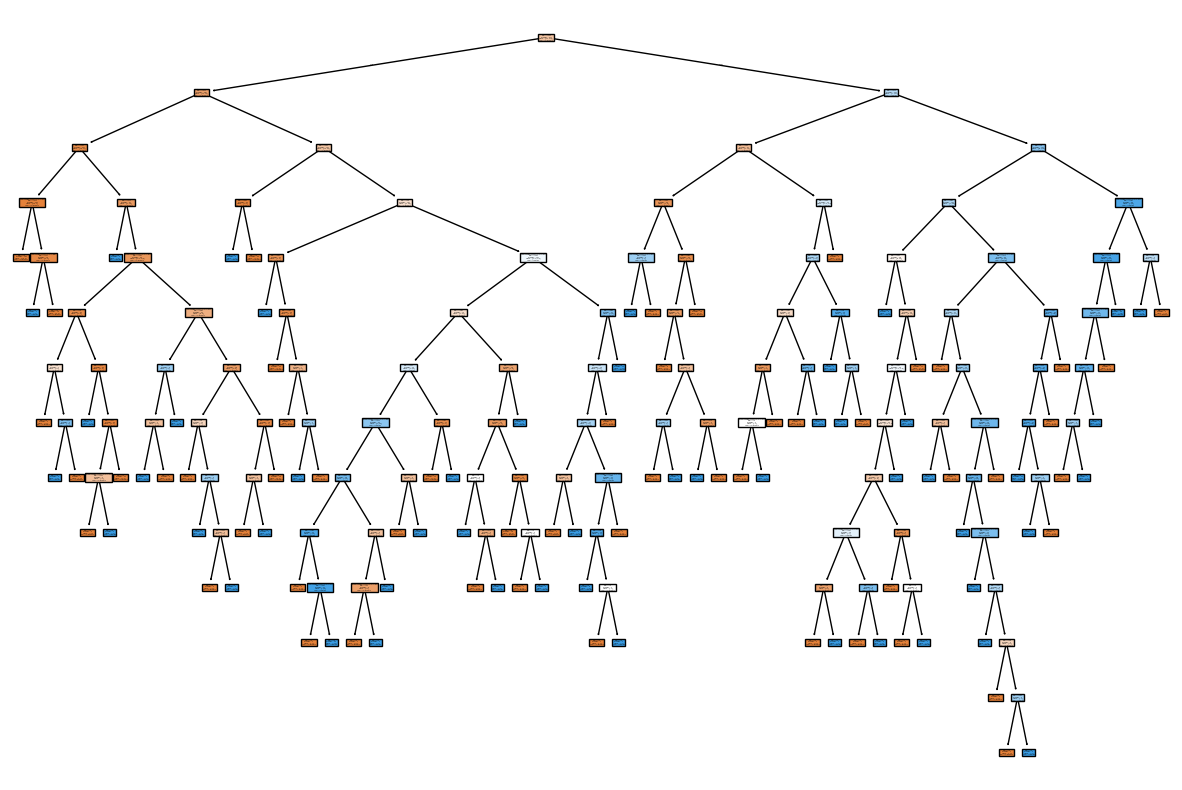

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plot_tree(modelo, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV

# Definir los valores a probar para cada hiperparámetro
parametros = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "criterion": ["gini", "entropy"]
}

# Crear el modelo base
modelo = DecisionTreeClassifier()

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(modelo, parametros, cv=5)
grid_search.fit(X_train, y_train)

# Mejor configuración encontrada
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [33]:
# Crear el modelo con los hiperparámetros óptimos
modelo_optimo = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2)

# Entrenar el modelo
modelo_optimo.fit(X_train, y_train)

# Evaluar el modelo optimizado
y_pred_optimo = modelo_optimo.predict(X_test)
accuracy_optima = accuracy_score(y_test, y_pred_optimo)

print(f"Precisión del modelo optimizado: {accuracy_optima:.2f}")

Precisión del modelo optimizado: 0.76


In [35]:
import joblib
import os

# Guardar el modelo entrenado en "models/modelo_decision_tree.pkl"
joblib.dump(modelo_optimo, "/workspaces/Decision_tree_project/models/modelo_decision_tree.pkl")

print("Modelo guardado exitosamente.")


Modelo guardado exitosamente.


In [37]:
# Cargar el modelo desde el archivo
modelo_cargado = joblib.load("/workspaces/Decision_tree_project/models/modelo_decision_tree.pkl")

# Verificar que funciona correctamente
y_pred_nuevo = modelo_cargado.predict(X_test)
print(f"Precisión del modelo cargado: {accuracy_score(y_test, y_pred_nuevo):.2f}")

Precisión del modelo cargado: 0.76
